# Sales Forecast

Se provee una base de datos con 4 años, desde enero 2015 hasta diciembre 2018, de  información de ventas de una compañía. Se pide realizar el análisis exploratorio correspondiente, describir los datos y mostrar hallazgos que le resulten interesantes para compartir con la junta directiva, y de igual forma, se pide predecir las ventas para los  siguientes 3 meses. De ser posible, proveer un intervalo de predicción con su respectivo nivel de confianza. Cuando sea necesario, explicar el hilo de pensamiento que se siguió al estar modelando.

## Análisis Exploratorio de Datos

In [1]:
import pandas as pd
df_sales_raw = pd.read_csv("Business case/sales_forecast.csv")

# Vista general del dataset
print("Dimensiones del dataset:", df_sales_raw.shape)
df_sales_raw.info()

Dimensiones del dataset: (9800, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9

In [2]:
# Primeras filas
display(df_sales_raw.head())

# Verificar valores nulos por columna
print("\nValores nulos por columna:")
print(df_sales_raw.isnull().sum())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680



Valores nulos por columna:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [3]:
# Columnas categóricas y su número de categorías únicas
print("\nValores únicos por columna categórica:")
print(df_sales_raw.select_dtypes(include='object').nunique())


Valores únicos por columna categórica:
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
dtype: int64



* El archivo tiene 9800 registros y 18 columnas.
* La única columna con valores nulos es Postal Code (11 nulos).
* Las fechas (Order Date, Ship Date) están como strings y se deben convertir a tipo datetime.
* La variable objetivo a predecir es Sales (numérica).



In [4]:
df_sales = df_sales_raw.copy()

# Corregir formato de fechas
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], format="%d/%m/%Y")
df_sales['Ship Date'] = pd.to_datetime(df_sales['Ship Date'], format="%d/%m/%Y")

# Eliminar columnas irrelevantes para el análisis predictivo
cols_to_drop = ['Row ID', 'Order ID']
df_sales.drop(columns=cols_to_drop, inplace=True)

# Verificar estructura del dataframe
print(df_sales.info())
print(df_sales.isnull().sum())
df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9800 non-null   datetime64[ns]
 1   Ship Date      9800 non-null   datetime64[ns]
 2   Ship Mode      9800 non-null   object        
 3   Customer ID    9800 non-null   object        
 4   Customer Name  9800 non-null   object        
 5   Segment        9800 non-null   object        
 6   Country        9800 non-null   object        
 7   City           9800 non-null   object        
 8   State          9800 non-null   object        
 9   Postal Code    9789 non-null   float64       
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sales          9800 n

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


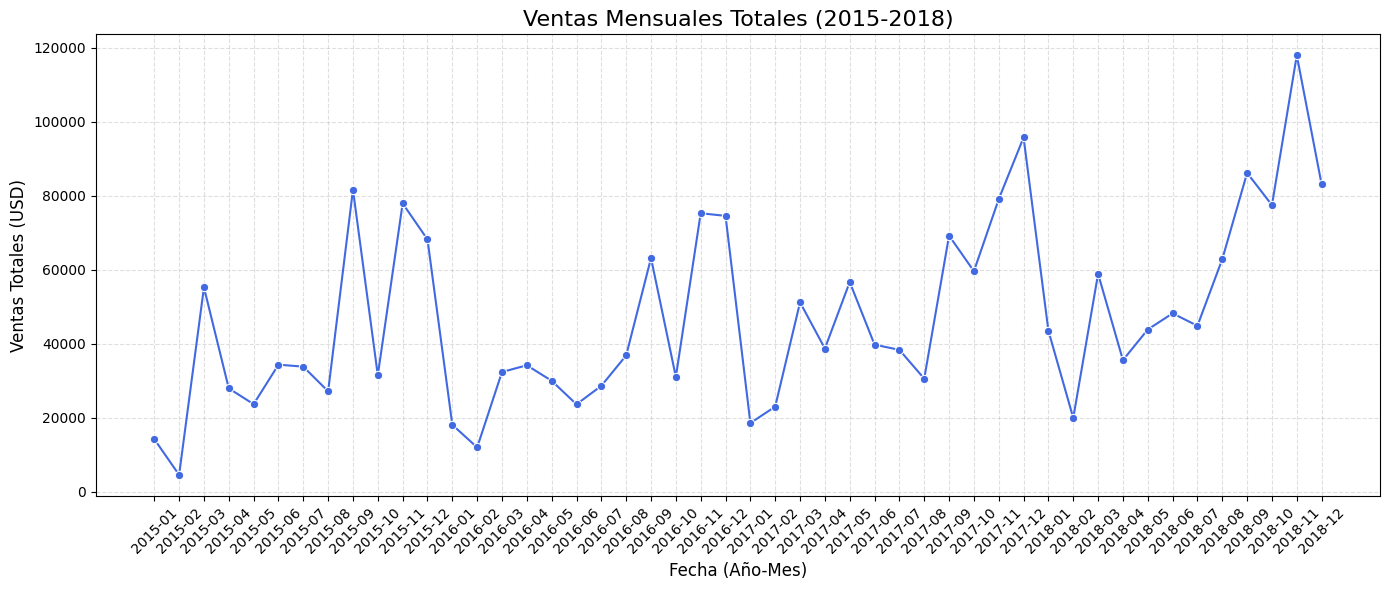

In [5]:
# Ventas por mes
import matplotlib.pyplot as plt
import seaborn as sns

df_sales['Year-Month'] = df_sales['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df_sales.groupby('Year-Month')['Sales'].sum().reset_index()

# Gráfico de línea de ventas mensuales
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Sales', marker='o', color='royalblue')
plt.title('Ventas Mensuales Totales (2015-2018)', fontsize=16)
plt.xlabel('Fecha (Año-Mes)', fontsize=12)
plt.ylabel('Ventas Totales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("imagenes/ventas_mensuales_totales.png", dpi=300)
plt.show()

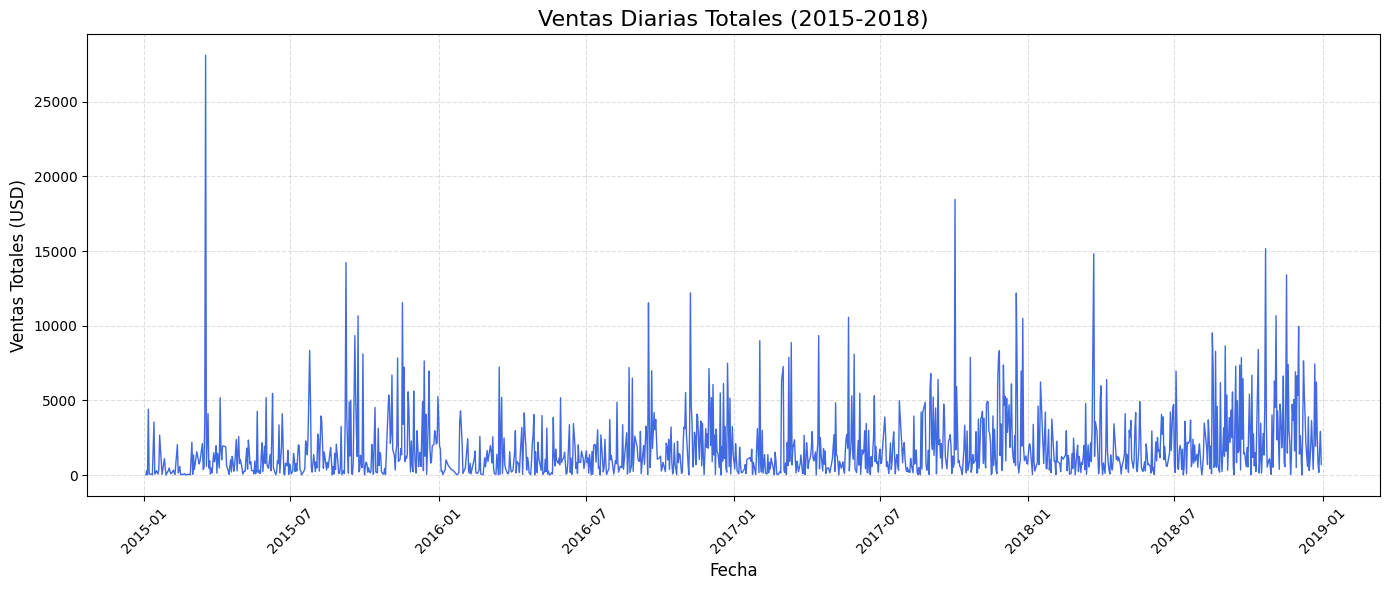

In [6]:
# Ventas diarias
import matplotlib.pyplot as plt
import seaborn as sns

daily_sales = df_sales.groupby('Order Date')['Sales'].sum().reset_index()

# Gráfico de línea de ventas diarias
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='Order Date', y='Sales', color='royalblue', linewidth=1)
plt.title('Ventas Diarias Totales (2015-2018)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("imagenes/ventas_diarias_totales.png", dpi=300)
plt.show()

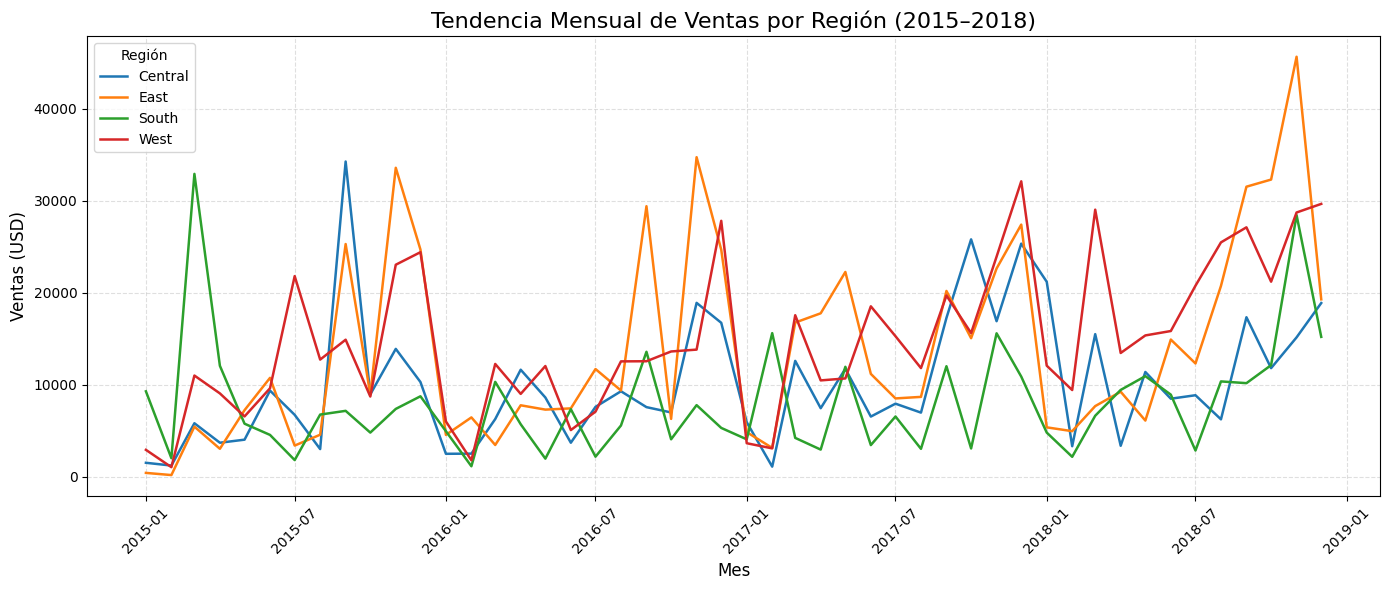

In [7]:
# Agrupar por mes y región
monthly_region_sales = df_sales.groupby([pd.Grouper(key='Order Date', freq='MS'), 'Region'])['Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_region_sales, x='Order Date', y='Sales', hue='Region', linewidth=1.8)

plt.title('Tendencia Mensual de Ventas por Región (2015–2018)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Región')
plt.tight_layout()

plt.savefig("imagenes/ventas_mensuales_por_region.png", dpi=300)
plt.show()

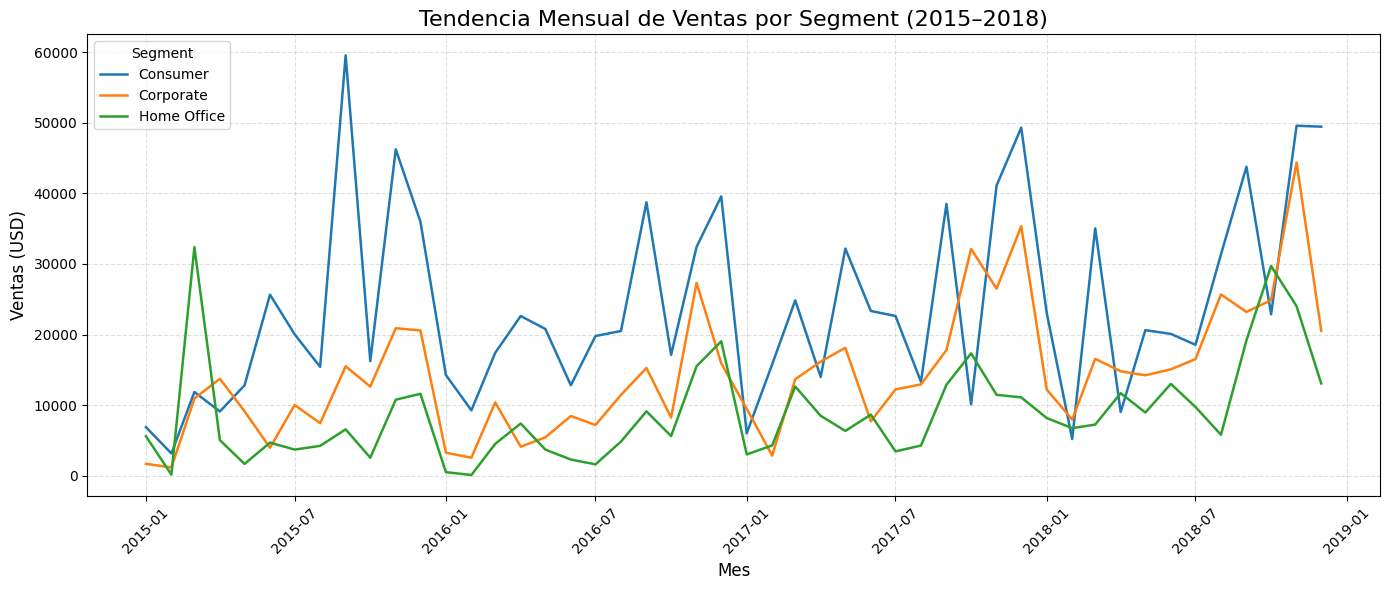

In [8]:
# Agrupar por mes y región
monthly_Segment_sales = df_sales.groupby([pd.Grouper(key='Order Date', freq='MS'), 'Segment'])['Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_Segment_sales, x='Order Date', y='Sales', hue='Segment', linewidth=1.8)

plt.title('Tendencia Mensual de Ventas por Segment (2015–2018)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Segment')
plt.tight_layout()

# Guardar la imagen
plt.savefig("imagenes/ventas_mensuales_por_Segment.png", dpi=300)
plt.show()

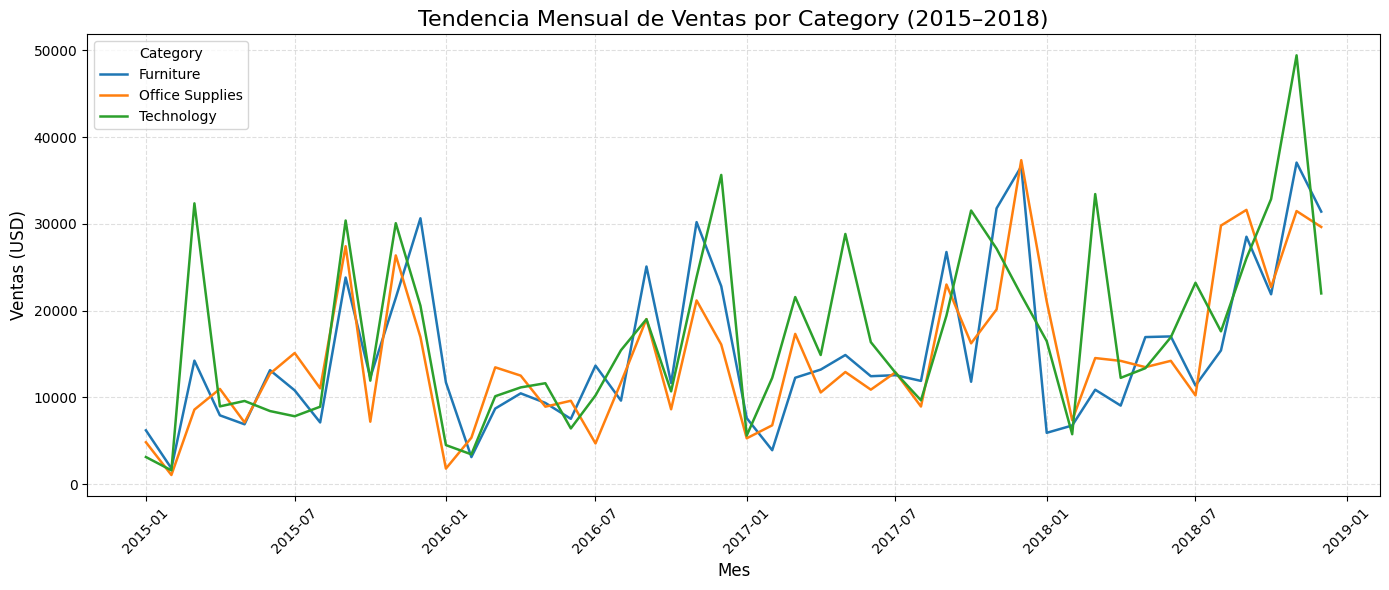

In [9]:
# Agrupar por mes y región
monthly_Category_sales = df_sales.groupby([pd.Grouper(key='Order Date', freq='MS'), 'Category'])['Sales'].sum().reset_index()

# Crear el gráfico
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_Category_sales, x='Order Date', y='Sales', hue='Category', linewidth=1.8)

plt.title('Tendencia Mensual de Ventas por Category (2015–2018)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Category')
plt.tight_layout()

# Guardar la imagen
plt.savefig("imagenes/ventas_mensuales_por_Category.png", dpi=300)
plt.show()

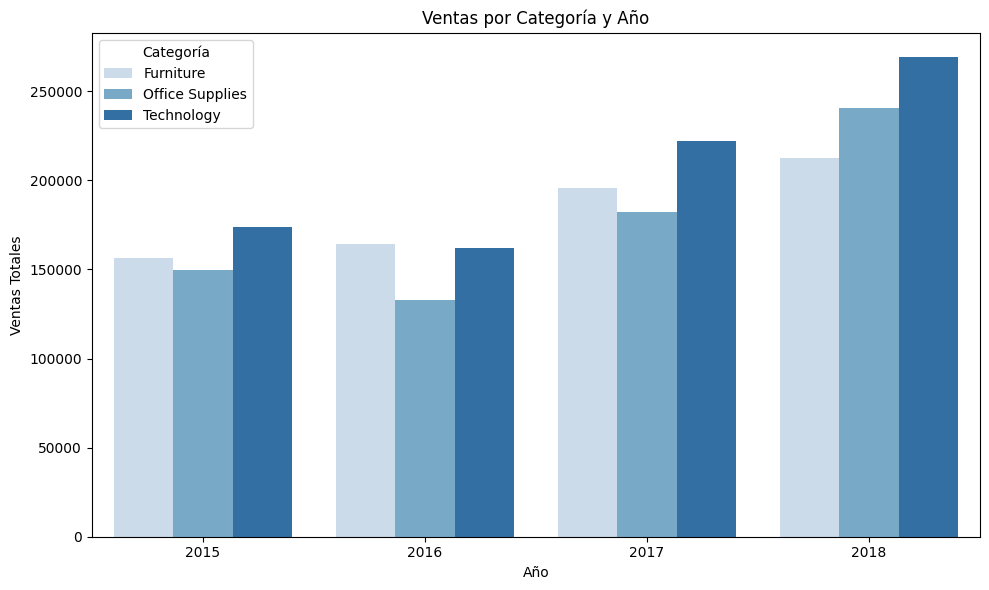

In [10]:
# Ventas por Año y Categoria
df_sales["Year"] = df_sales["Order Date"].dt.year
ventas_categoria_anual = df_sales.groupby(["Year", "Category"])["Sales"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_categoria_anual, x="Year", y="Sales", hue="Category", palette="Blues")

plt.title("Ventas por Categoría y Año")
plt.xlabel("Año")
plt.ylabel("Ventas Totales")
plt.legend(title="Categoría")
plt.tight_layout()

# Guardar imagen
plt.savefig("imagenes/ventas_categoria_anual.png", dpi=300)
plt.show()

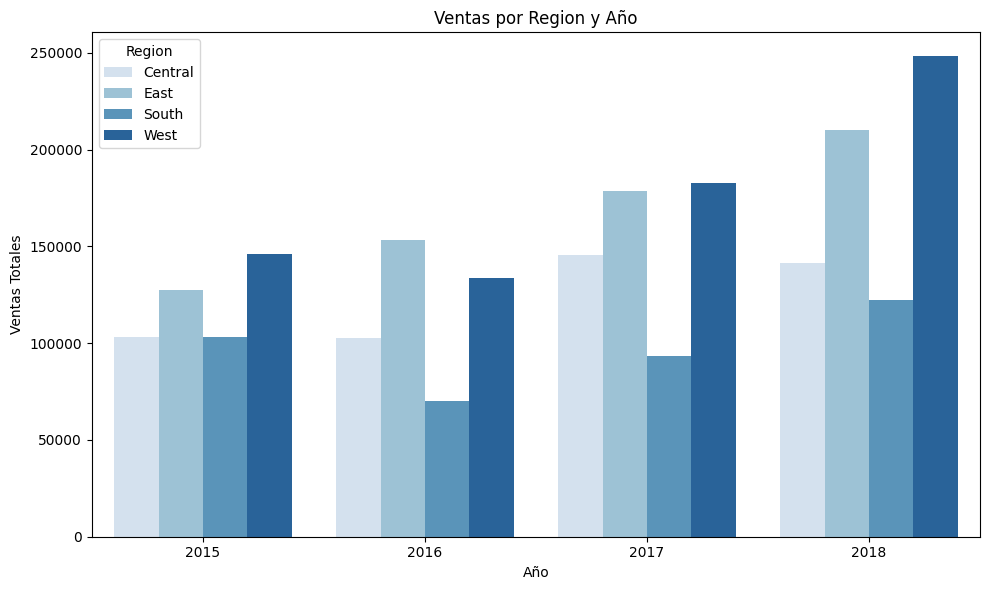

In [11]:
# Por Region y año
ventas_region_anual = df_sales.groupby(["Year", "Region"])["Sales"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_region_anual, x="Year", y="Sales", hue="Region", palette="Blues")

plt.title("Ventas por Region y Año")
plt.xlabel("Año")
plt.ylabel("Ventas Totales")
plt.legend(title="Region")
plt.tight_layout()

# Guardar imagen
plt.savefig("imagenes/ventas_region_anual.png", dpi=300)
plt.show()

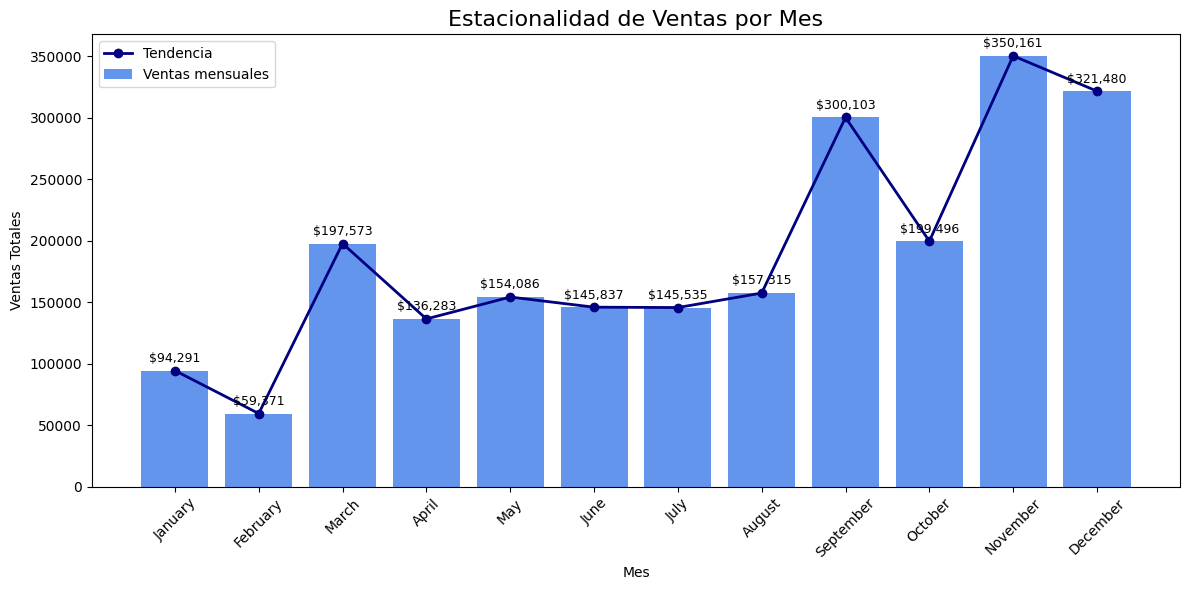

In [12]:
# Por Mes
df_sales["Month"] = df_sales["Order Date"].dt.month_name()

order_months = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

ventas_mensuales = df_sales.groupby("Month")["Sales"].sum().reindex(order_months)

# Crear gráfico combinado
plt.figure(figsize=(12, 6))
bars = plt.bar(ventas_mensuales.index, ventas_mensuales.values, color="cornflowerblue", label="Ventas mensuales")
plt.plot(ventas_mensuales.index, ventas_mensuales.values, color="navy", marker="o", linewidth=2, label="Tendencia")
for i, value in enumerate(ventas_mensuales.values):
    plt.text(i, value + max(ventas_mensuales.values)*0.02, f"${int(value):,}", ha='center', fontsize=9)
plt.title("Estacionalidad de Ventas por Mes", fontsize=16)
plt.xlabel("Mes")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Guardar imagen
plt.savefig("imagenes/ventas_estacionalidad_mensual.png", dpi=300)
plt.show()

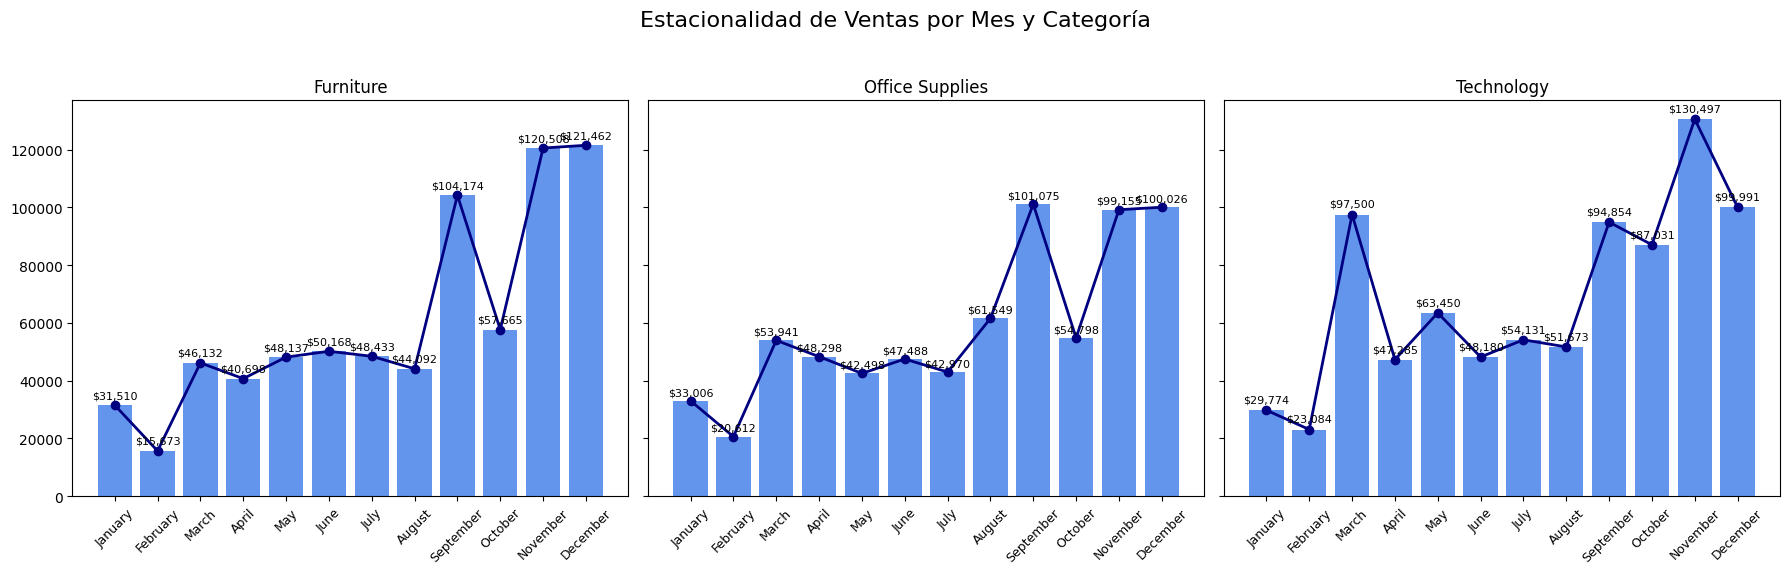

In [13]:
# --- Gráfico por Categoría ---
categorias = df_sales["Category"].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(categorias), figsize=(18, 6), sharey=True)

for i, cat in enumerate(categorias):
    ax = axes[i]
    df_cat = df_sales[df_sales["Category"] == cat]
    ventas_mensuales = df_cat.groupby("Month", observed=False)["Sales"].sum().reindex(order_months)

    ax.bar(ventas_mensuales.index, ventas_mensuales.values, color="cornflowerblue", label="Ventas mensuales")
    ax.plot(ventas_mensuales.index, ventas_mensuales.values, color="navy", marker="o", linewidth=2, label="Tendencia")
    
    for j, value in enumerate(ventas_mensuales.values):
        ax.text(j, value + max(ventas_mensuales.values)*0.02, f"${int(value):,}", ha='center', fontsize=8)
    
    ax.set_title(cat)
    ax.tick_params(axis='x', rotation=45, labelsize=9)  # Ajuste aquí

fig.suptitle("Estacionalidad de Ventas por Mes y Categoría", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Guardar imagen
fig.savefig("imagenes/ventas_mensuales_por_categoria.png", dpi=300)

plt.show()

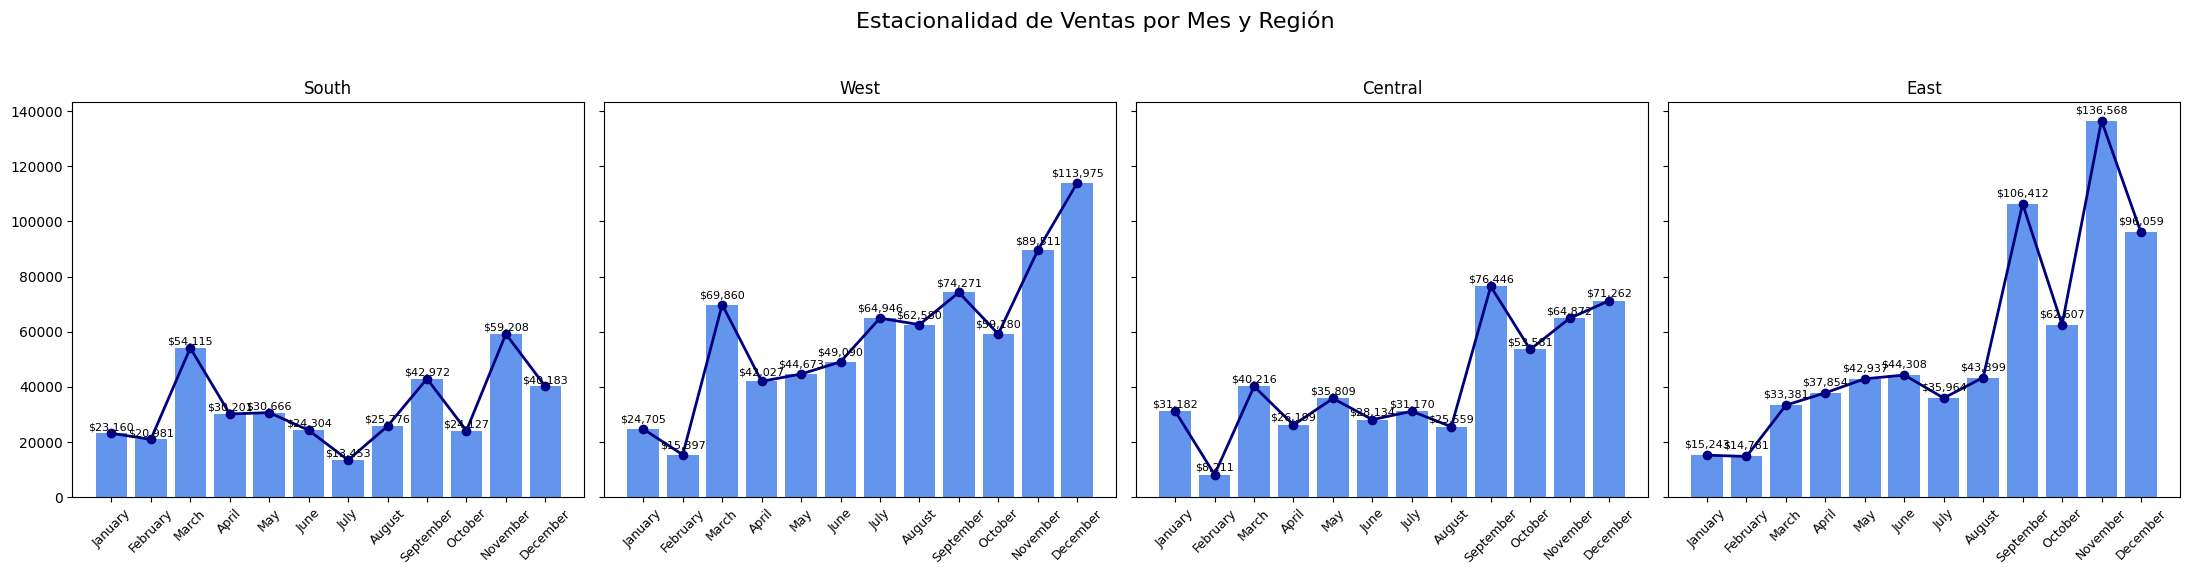

In [14]:
# --- Gráfico por Región ---
regiones = df_sales["Region"].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(regiones), figsize=(22, 6), sharey=True)

for i, reg in enumerate(regiones):
    ax = axes[i]
    df_reg = df_sales[df_sales["Region"] == reg]
    ventas_mensuales = df_reg.groupby("Month", observed=False)["Sales"].sum().reindex(order_months)

    ax.bar(ventas_mensuales.index, ventas_mensuales.values, color="cornflowerblue", label="Ventas mensuales")
    ax.plot(ventas_mensuales.index, ventas_mensuales.values, color="navy", marker="o", linewidth=2, label="Tendencia")
    
    for j, value in enumerate(ventas_mensuales.values):
        ax.text(j, value + max(ventas_mensuales.values)*0.02, f"${int(value):,}", ha='center', fontsize=8)
    
    ax.set_title(reg)
    ax.tick_params(axis='x', rotation=45, labelsize=9)

fig.suptitle("Estacionalidad de Ventas por Mes y Región", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Guardar imagen
fig.savefig("imagenes/ventas_mensuales_por_region.png", dpi=300)

plt.show()

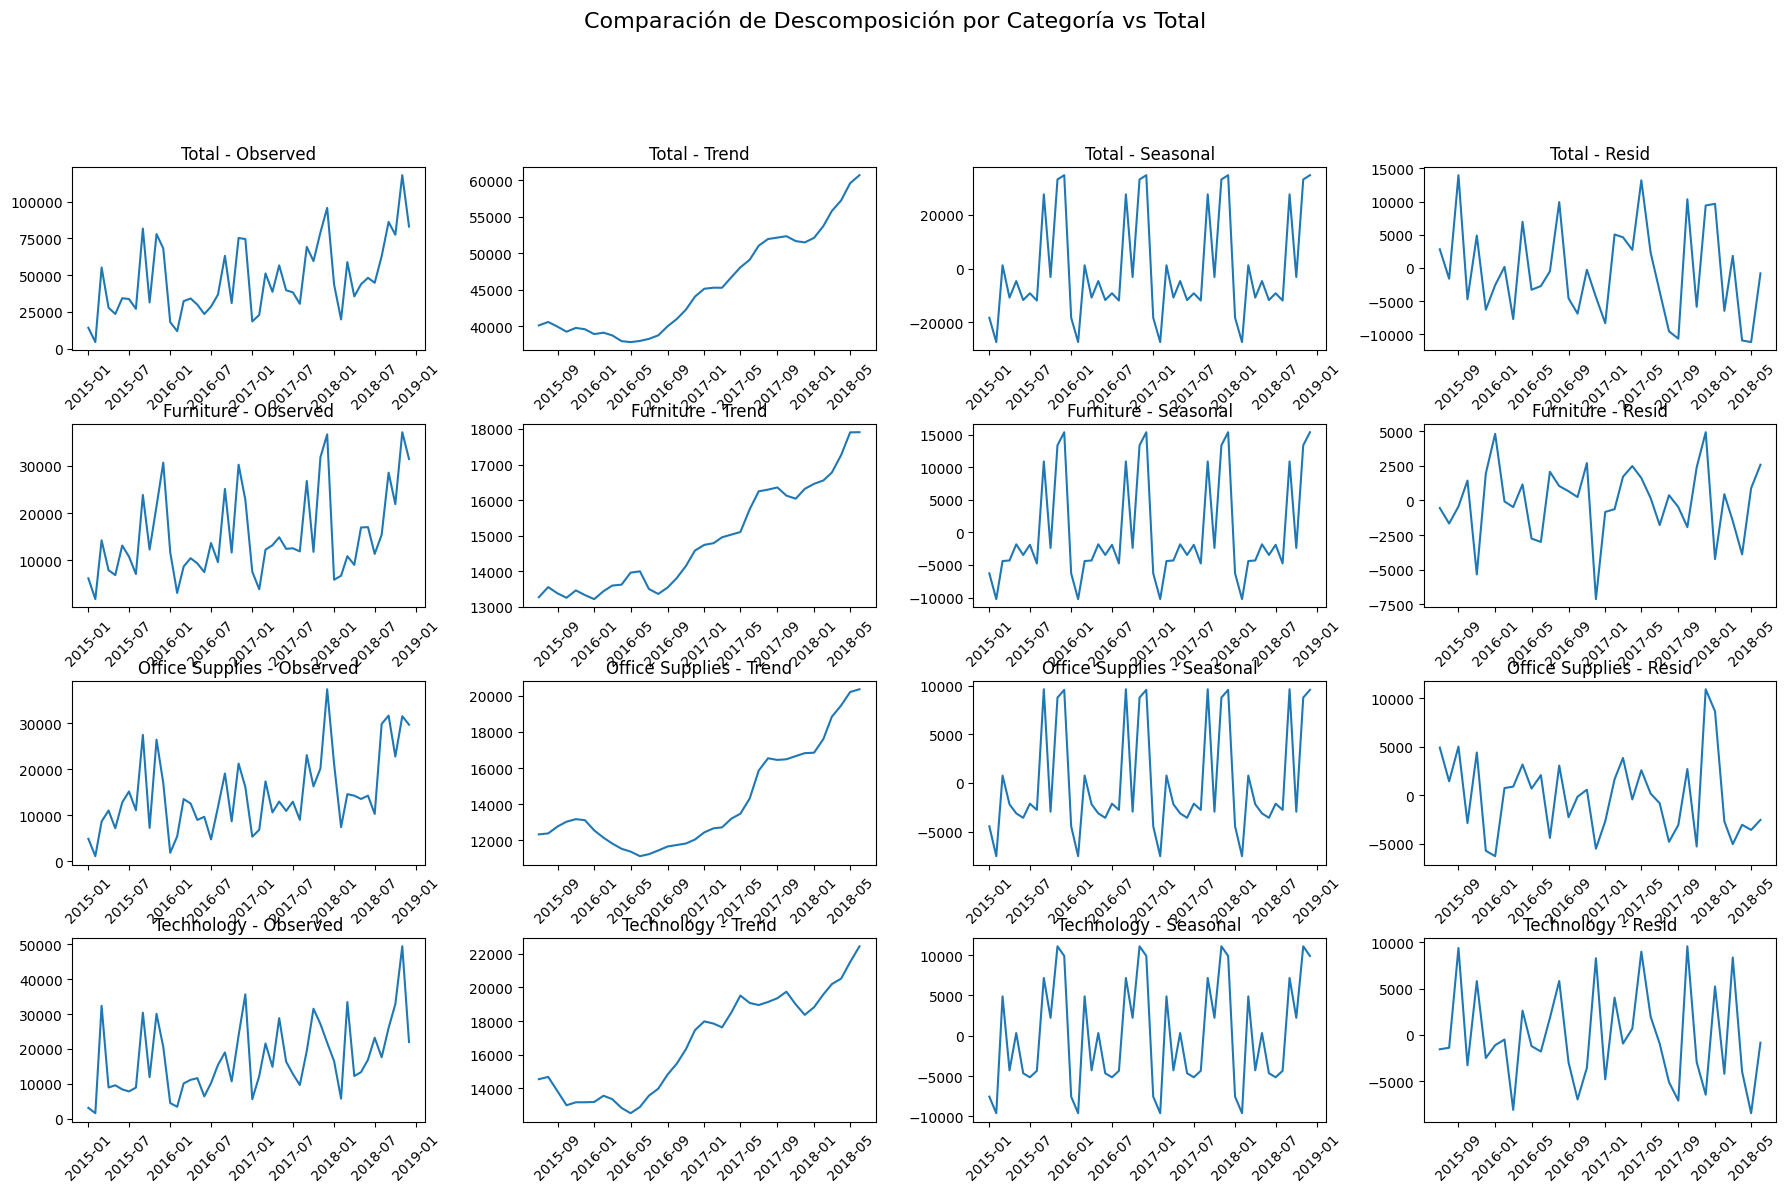

In [15]:
# Comparación de Descomposición por Categoría vs Total
import os
from statsmodels.tsa.seasonal import seasonal_decompose

# Crear carpeta si no existe
os.makedirs("imagenes/descomposicion/comparativa", exist_ok=True)

# ---- Función auxiliar para obtener serie mensual ----
def obtener_serie_mensual(df):
    serie = df.copy()
    serie["YearMonth"] = serie["Order Date"].dt.to_period("M").astype(str)
    serie = serie.groupby("YearMonth")["Sales"].sum()
    serie.index = pd.to_datetime(serie.index)
    serie = serie.asfreq("MS").fillna(0)
    return serie

# ---- Series por categoría ----
categorias = df_sales["Category"].unique()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
fig.suptitle("Comparación de Descomposición por Categoría vs Total", fontsize=16, y=1.02)

# Primera fila: total
serie_total = obtener_serie_mensual(df_sales)
res_total = seasonal_decompose(serie_total, model="additive", period=12)

for i, component in enumerate(["observed", "trend", "seasonal", "resid"]):
    axes[0, i].plot(getattr(res_total, component), label="Total")
    axes[0, i].set_title(f"Total - {component.capitalize()}")
    axes[0, i].tick_params(axis='x', rotation=45)

# Filas siguientes: por categoría
for row, cat in enumerate(categorias, start=1):
    serie = obtener_serie_mensual(df_sales[df_sales["Category"] == cat])
    res = seasonal_decompose(serie, model="additive", period=12)
    for col, component in enumerate(["observed", "trend", "seasonal", "resid"]):
        axes[row, col].plot(getattr(res, component), label=cat)
        axes[row, col].set_title(f"{cat} - {component.capitalize()}")
        axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.4)
plt.savefig("imagenes/descomposicion/comparativa/descomposicion_categorias_comparada.png", dpi=300)
plt.show()

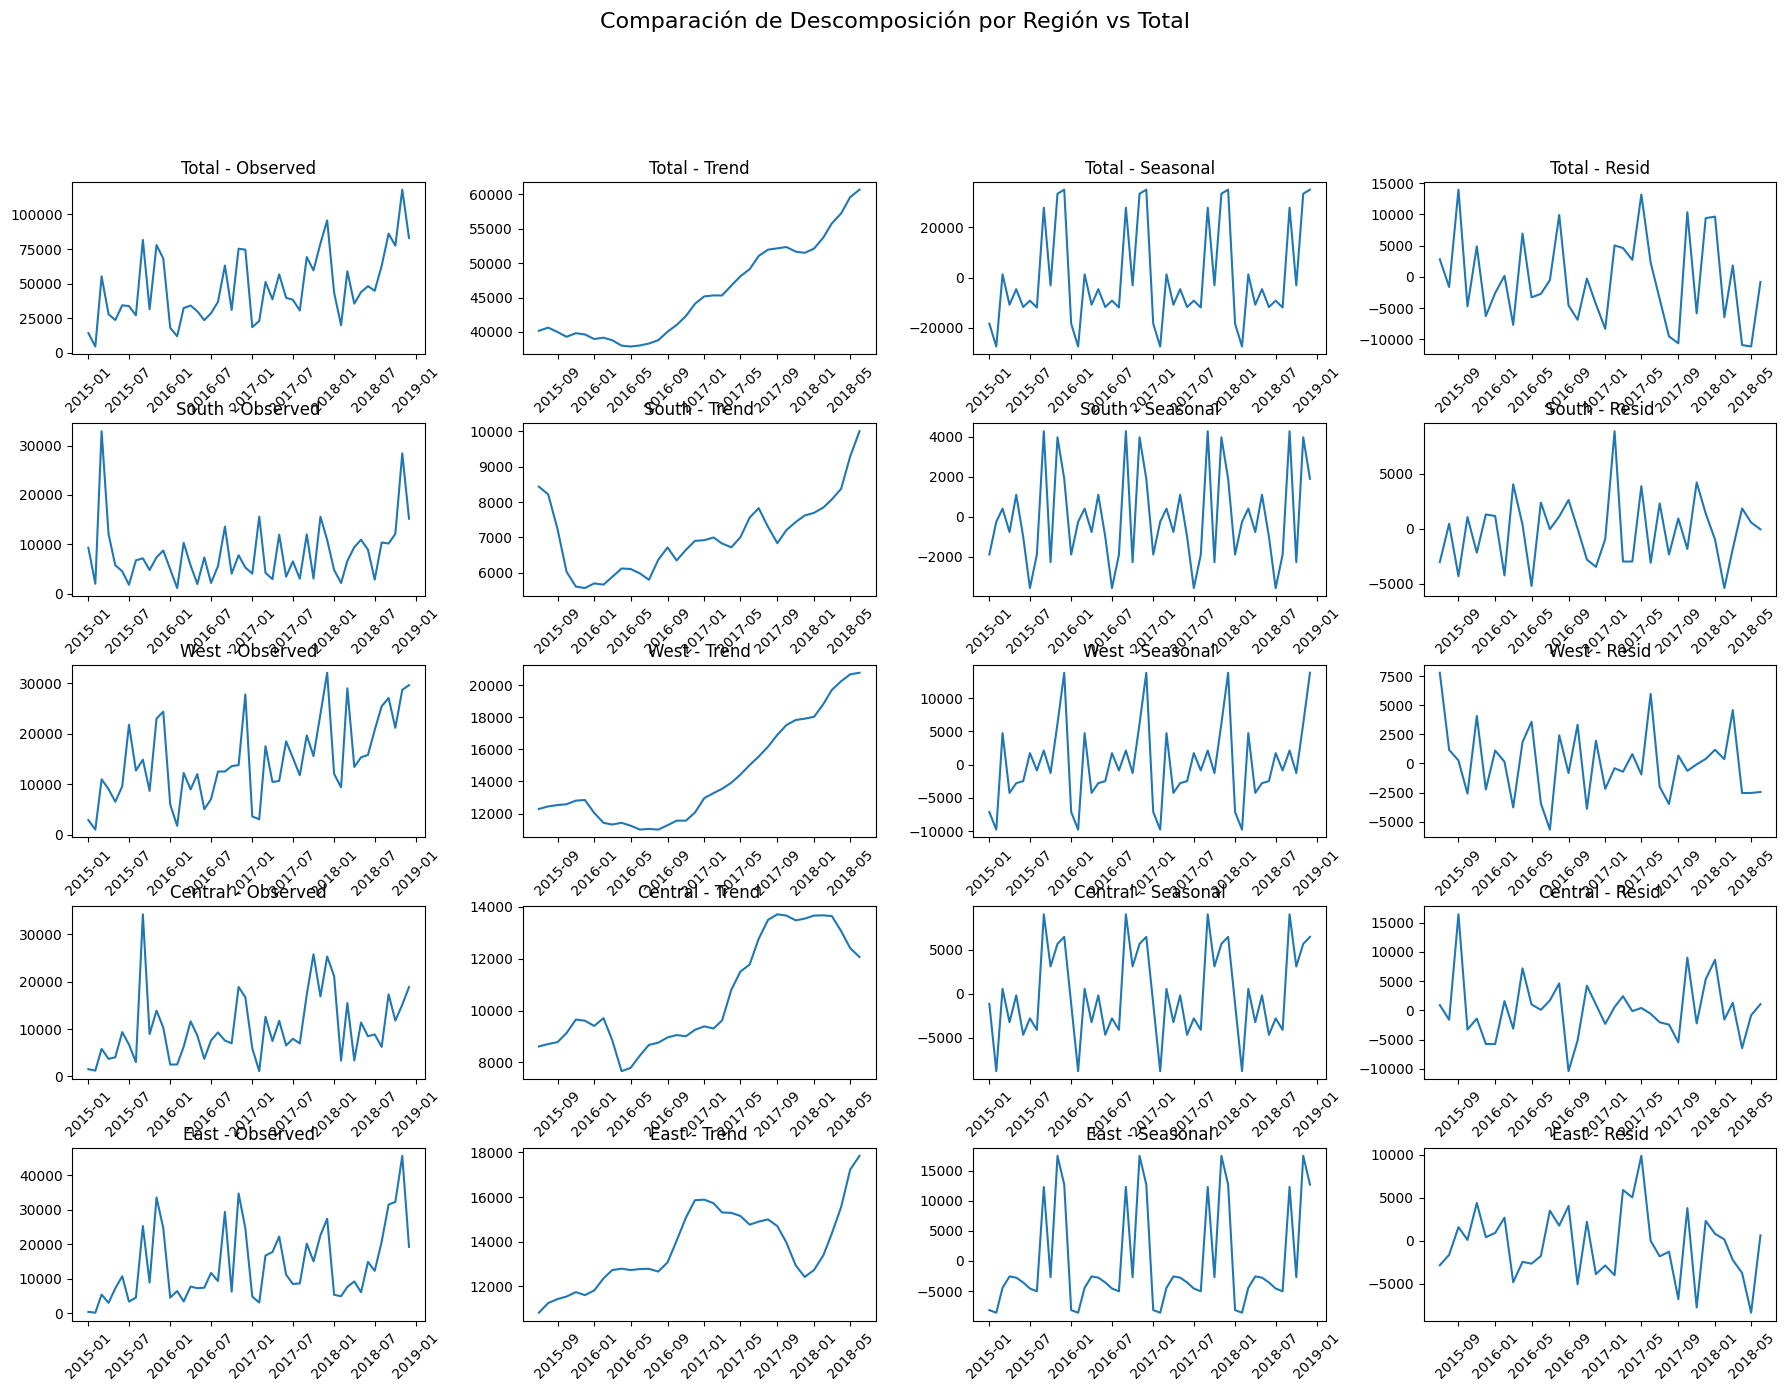

In [16]:
# Comparación de Descomposición por Region vs Total

from statsmodels.tsa.seasonal import seasonal_decompose

# Crear carpeta para guardar imagen
os.makedirs("imagenes/descomposicion/comparativa", exist_ok=True)

# Función auxiliar para obtener serie mensual
def obtener_serie_mensual(df):
    serie = df.copy()
    serie["YearMonth"] = serie["Order Date"].dt.to_period("M").astype(str)
    serie = serie.groupby("YearMonth")["Sales"].sum()
    serie.index = pd.to_datetime(serie.index)
    serie = serie.asfreq("MS").fillna(0)
    return serie

# Obtener lista de regiones
regiones = df_sales["Region"].unique()

# Crear subplots (1 + 4 regiones = 5 filas)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 14))
fig.suptitle("Comparación de Descomposición por Región vs Total", fontsize=16, y=1.02)

# Fila 0: Total
serie_total = obtener_serie_mensual(df_sales)
res_total = seasonal_decompose(serie_total, model="additive", period=12)

for i, componente in enumerate(["observed", "trend", "seasonal", "resid"]):
    axes[0, i].plot(getattr(res_total, componente), label="Total")
    axes[0, i].set_title(f"Total - {componente.capitalize()}")
    axes[0, i].tick_params(axis="x", rotation=45)

# Filas 1-4: Por región
for row, region in enumerate(regiones, start=1):
    serie = obtener_serie_mensual(df_sales[df_sales["Region"] == region])
    res = seasonal_decompose(serie, model="additive", period=12)
    for col, componente in enumerate(["observed", "trend", "seasonal", "resid"]):
        axes[row, col].plot(getattr(res, componente), label=region)
        axes[row, col].set_title(f"{region} - {componente.capitalize()}")
        axes[row, col].tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.4)
plt.savefig("imagenes/descomposicion/comparativa/descomposicion_regiones_comparada.png", dpi=300)
plt.show()

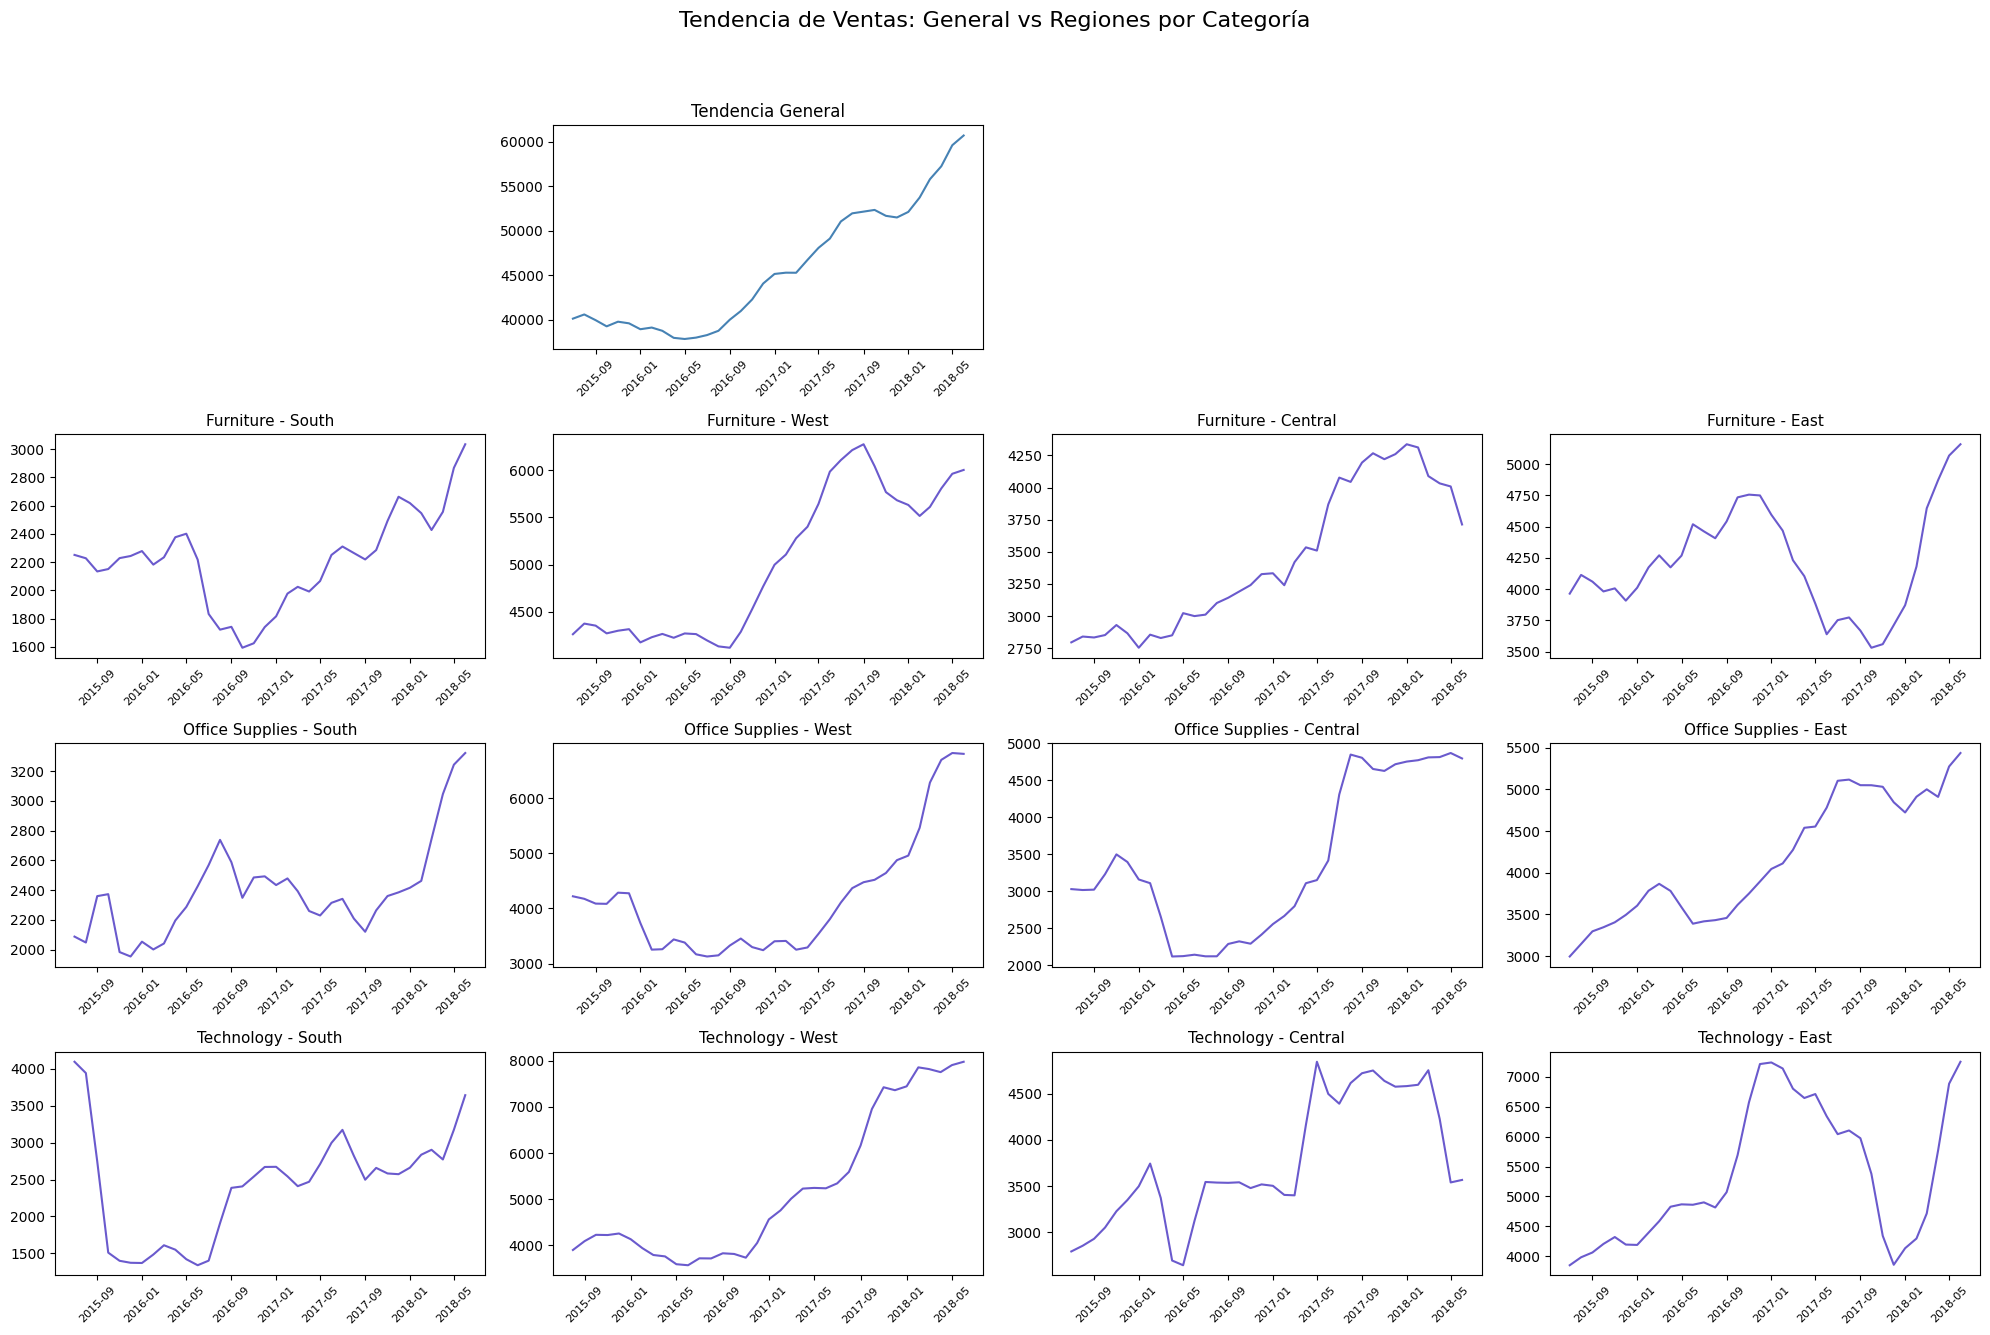

In [17]:
# Tendencia de Ventas: General vs Regiones por Categoría

from statsmodels.tsa.seasonal import seasonal_decompose
df_sales["Period"] = df_sales["Order Date"].dt.to_period("M").dt.to_timestamp()
# Agrupar por mes y sumar ventas (serie general)
serie_total = df_sales.groupby("Period")["Sales"].sum().asfreq("MS").fillna(0)

# Descomposición
result_total = seasonal_decompose(serie_total, model="additive", period=12)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 14))
axes = axes.flatten()

# General (centro superior)
axes[1].plot(result_total.trend, color="steelblue")
axes[1].set_title("Tendencia General", fontsize=12)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=8)

# Vaciar el resto de la fila superior
for i in [0, 2, 3]:
    fig.delaxes(axes[i])

# Paneles por categoría y región
panel = 4
for categoria in categorias:
    for region in regiones:
        df_sub = df_sales[(df_sales["Category"] == categoria) & (df_sales["Region"] == region)]
        serie = df_sub.groupby("Period")["Sales"].sum().asfreq("MS").fillna(0)
        if len(serie) >= 24:
            result = seasonal_decompose(serie, model="additive", period=12)
            axes[panel].plot(result.trend, color="slateblue")
            axes[panel].set_title(f"{categoria} - {region}", fontsize=11)
            axes[panel].tick_params(axis='x', labelrotation=45, labelsize=8)
        else:
            axes[panel].set_visible(False)
        panel += 1

fig.suptitle("Tendencia de Ventas: General vs Regiones por Categoría", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig("imagenes/descomposicion/comparativa/tendencia_fila_columna.png", dpi=300)
plt.show()

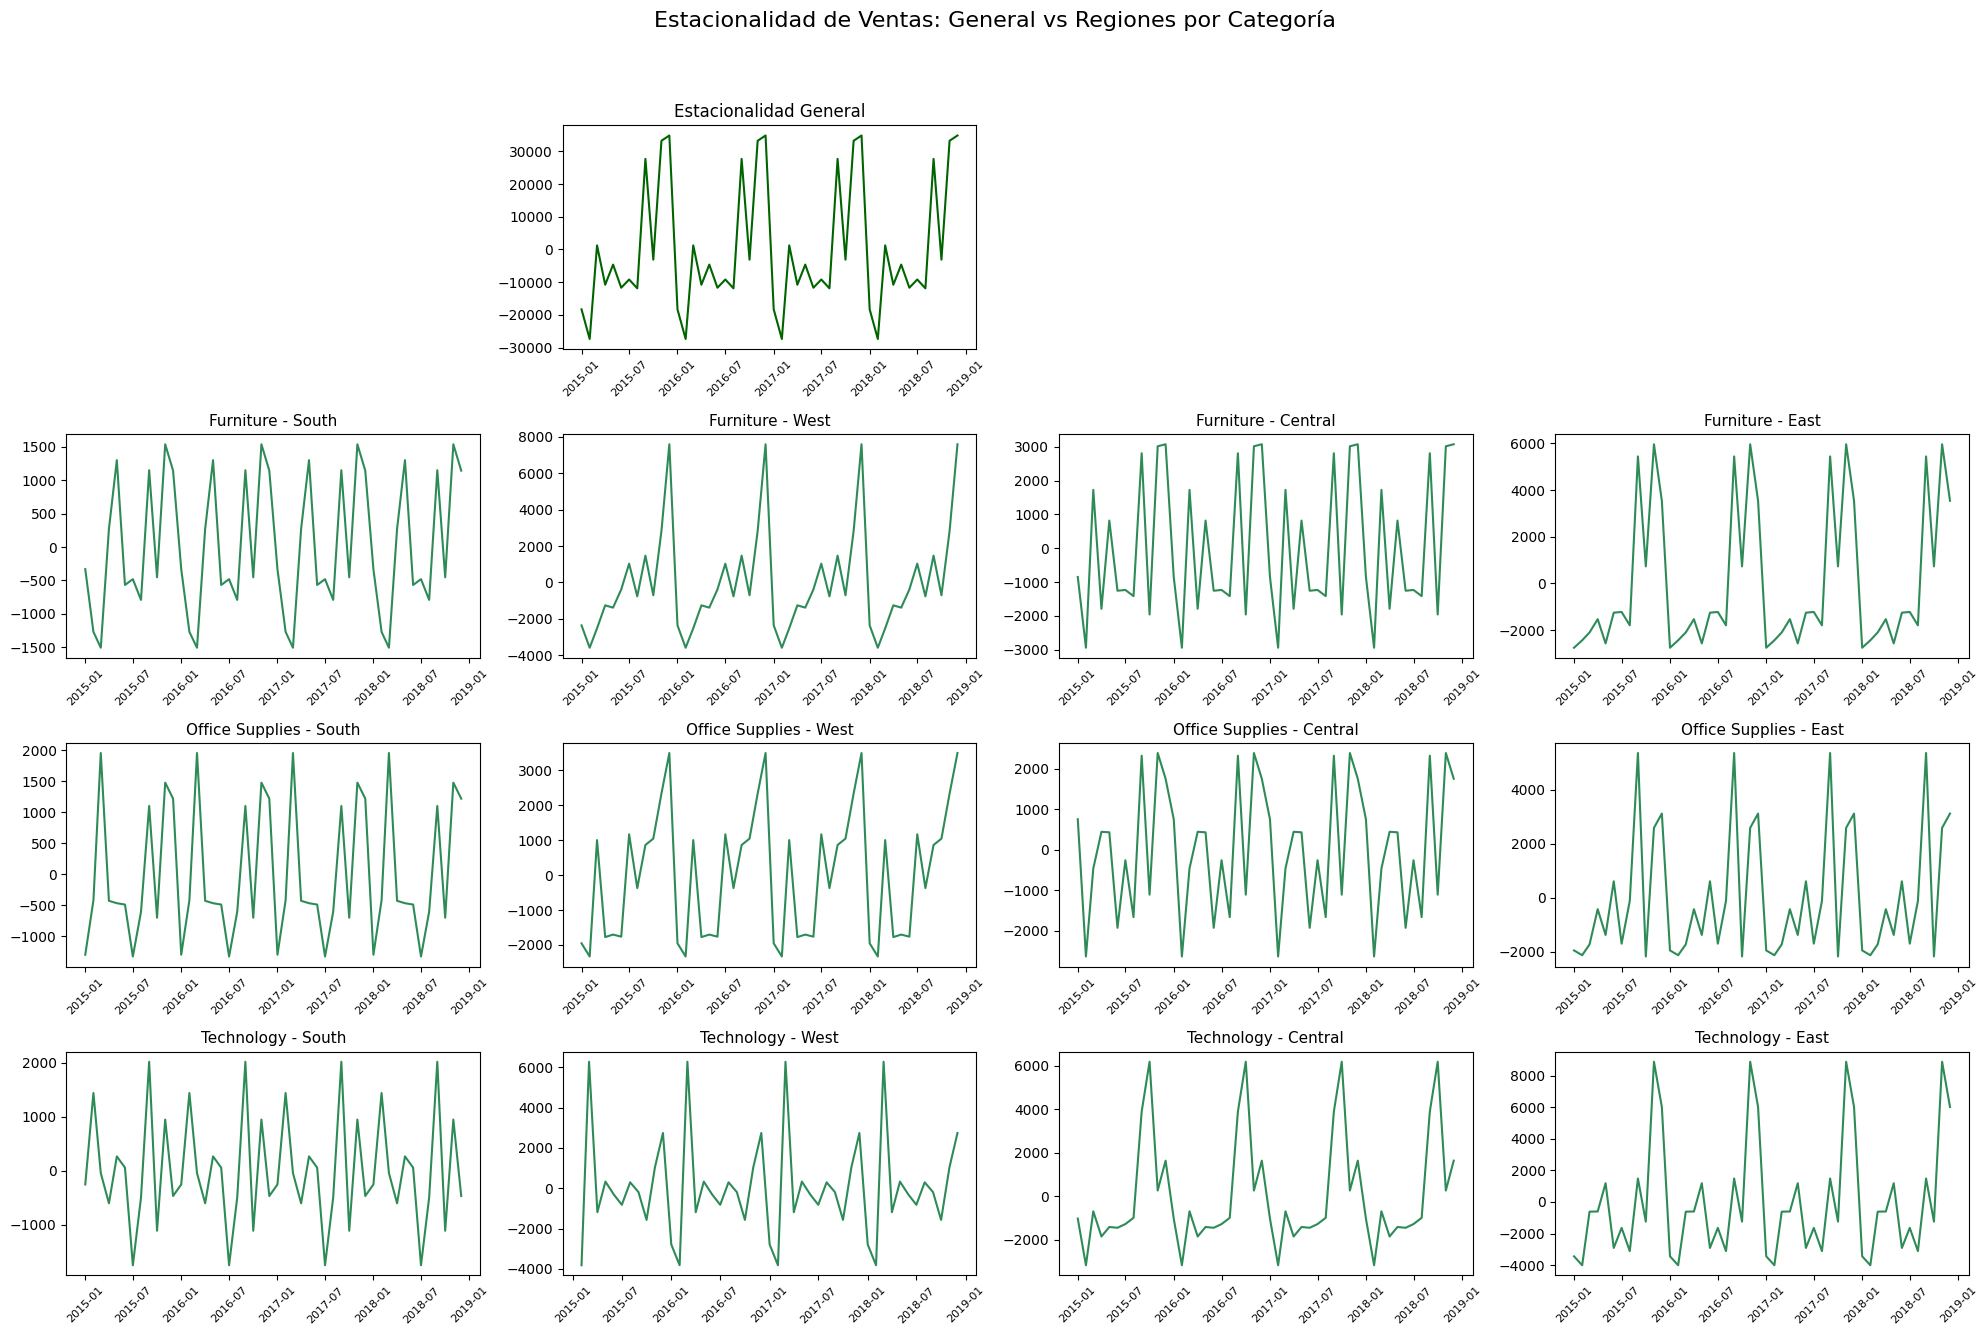

In [18]:
# Estacionalidad de Ventas: General vs Regiones por Categoría
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 14))
axes = axes.flatten()

axes[1].plot(result_total.seasonal, color="darkgreen")
axes[1].set_title("Estacionalidad General", fontsize=12)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=8)

for i in [0, 2, 3]:
    fig.delaxes(axes[i])

panel = 4
for categoria in categorias:
    for region in regiones:
        df_sub = df_sales[(df_sales["Category"] == categoria) & (df_sales["Region"] == region)]
        serie = df_sub.groupby("Period")["Sales"].sum().asfreq("MS").fillna(0)
        if len(serie) >= 24:
            result = seasonal_decompose(serie, model="additive", period=12)
            axes[panel].plot(result.seasonal, color="seagreen")
            axes[panel].set_title(f"{categoria} - {region}", fontsize=11)
            axes[panel].tick_params(axis='x', labelrotation=45, labelsize=8)
        else:
            axes[panel].set_visible(False)
        panel += 1

fig.suptitle("Estacionalidad de Ventas: General vs Regiones por Categoría", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig("imagenes/descomposicion/comparativa/estacionalidad_fila_columna.png", dpi=300)
plt.show()

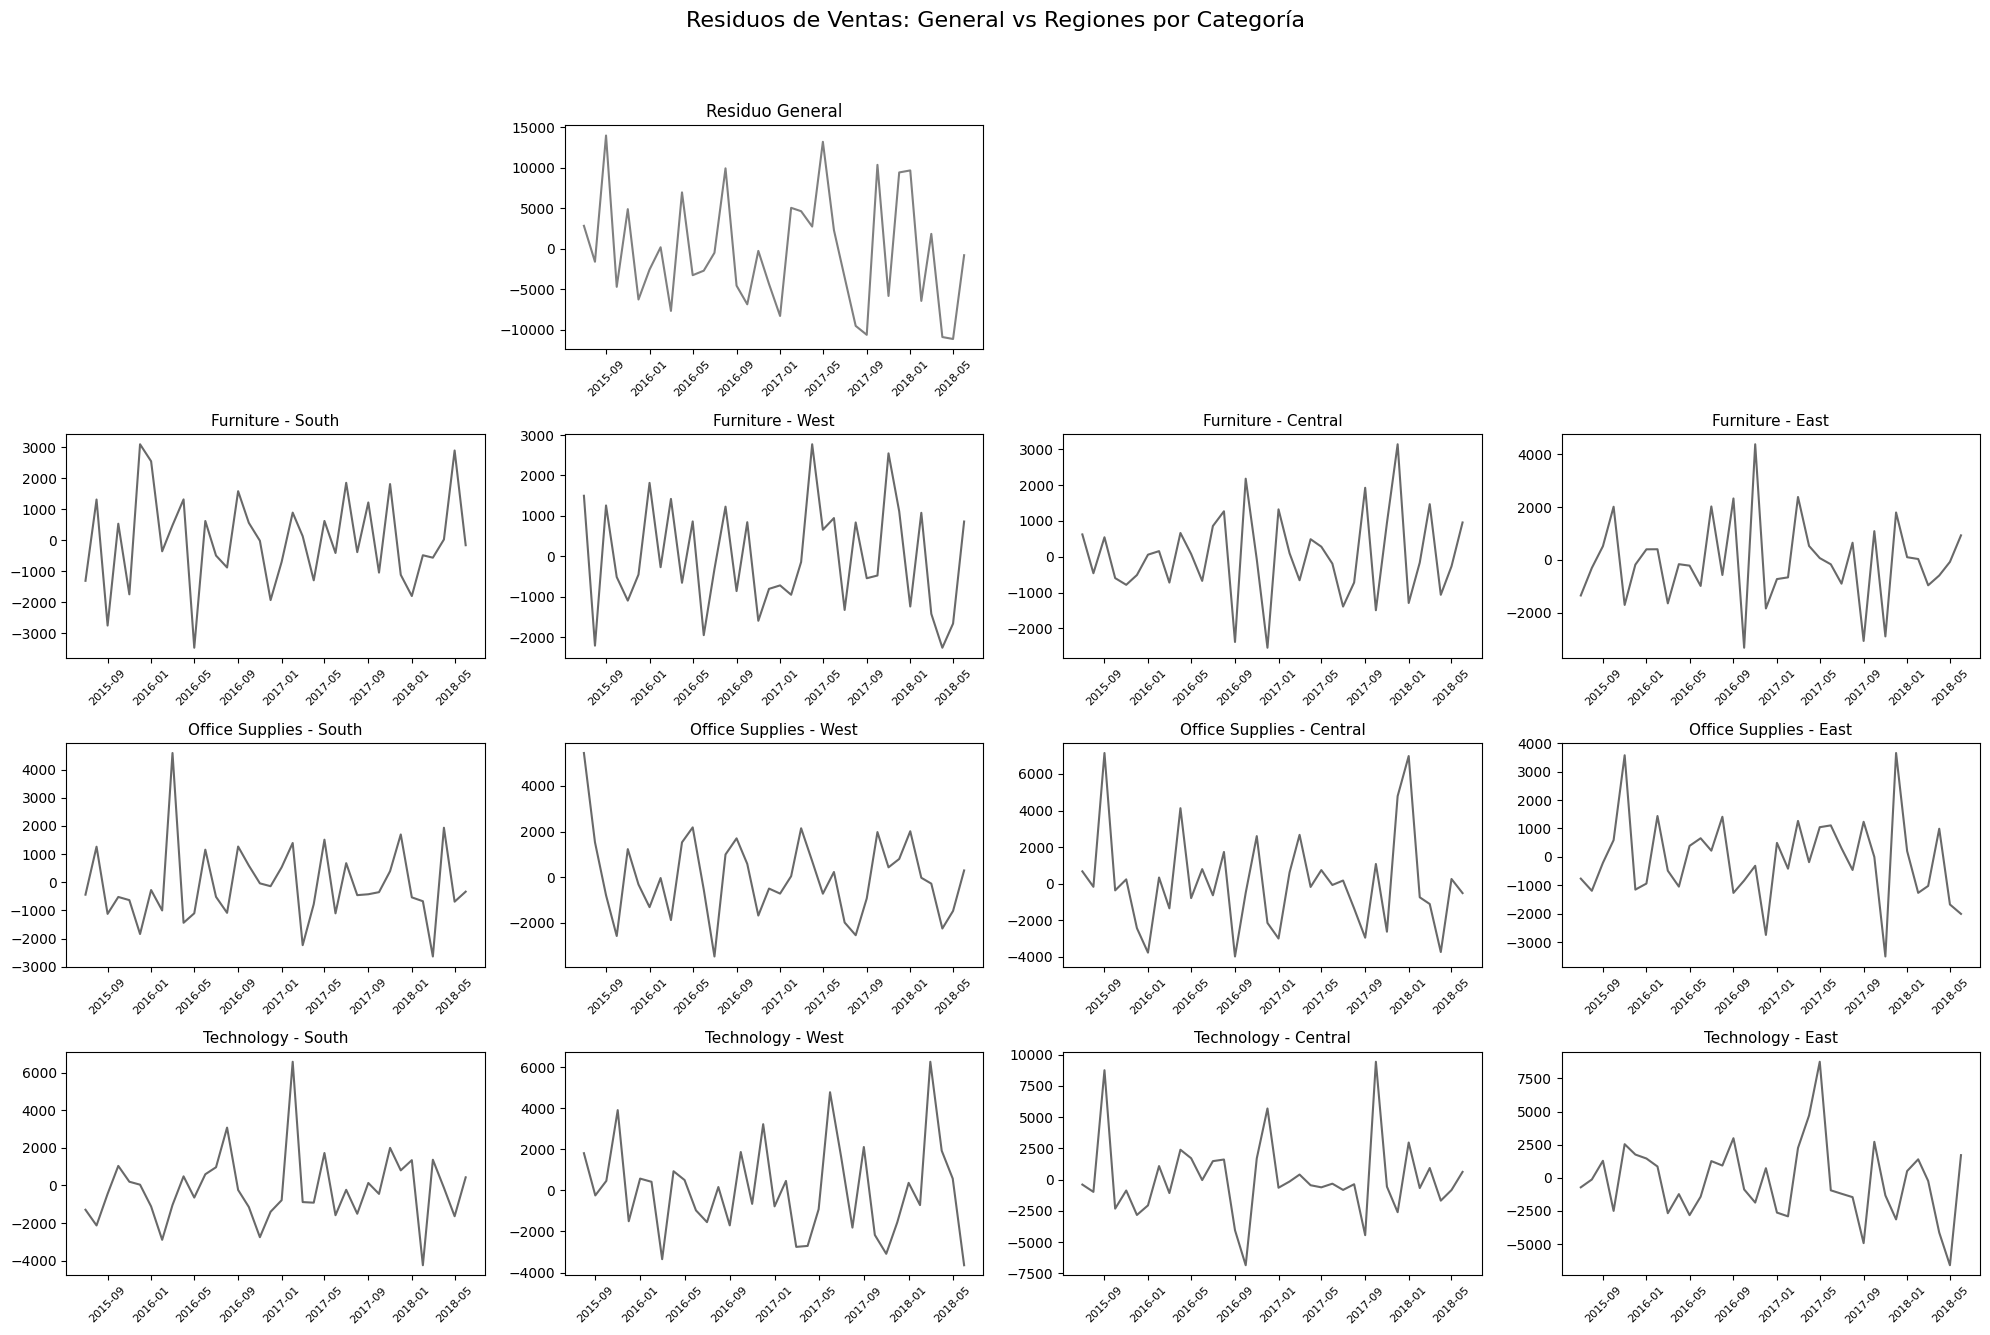

In [19]:
# Residuos de Ventas: General vs Regiones por Categoría
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 14))
axes = axes.flatten()

axes[1].plot(result_total.resid, color="gray")
axes[1].set_title("Residuo General", fontsize=12)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=8)

for i in [0, 2, 3]:
    fig.delaxes(axes[i])

panel = 4
for categoria in categorias:
    for region in regiones:
        df_sub = df_sales[(df_sales["Category"] == categoria) & (df_sales["Region"] == region)]
        serie = df_sub.groupby("Period")["Sales"].sum().asfreq("MS").fillna(0)
        if len(serie) >= 24:
            result = seasonal_decompose(serie, model="additive", period=12)
            axes[panel].plot(result.resid, color="dimgray")
            axes[panel].set_title(f"{categoria} - {region}", fontsize=11)
            axes[panel].tick_params(axis='x', labelrotation=45, labelsize=8)
        else:
            axes[panel].set_visible(False)
        panel += 1

fig.suptitle("Residuos de Ventas: General vs Regiones por Categoría", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig("imagenes/descomposicion/comparativa/residuos_fila_columna.png", dpi=300)
plt.show()